In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import pickle
%matplotlib inline  

In [2]:
FREQ_DIST_FILE = '../train-processed-freqdist.pkl'
BI_FREQ_DIST_FILE = '../train-processed-freqdist-bi.pkl'

In [14]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(20)
unigrams

[('i', 381548),
 ('to', 281793),
 ('the', 260956),
 ('a', 188931),
 ('my', 157772),
 ('and', 151507),
 ('you', 135604),
 ('is', 117954),
 ('it', 116674),
 ('for', 107988),
 ('in', 107451),
 ('of', 91704),
 ('im', 90385),
 ('on', 83589),
 ('me', 80537),
 ('so', 76252),
 ('have', 72596),
 ('that', 71260),
 ('but', 66351),
 ('just', 63290)]

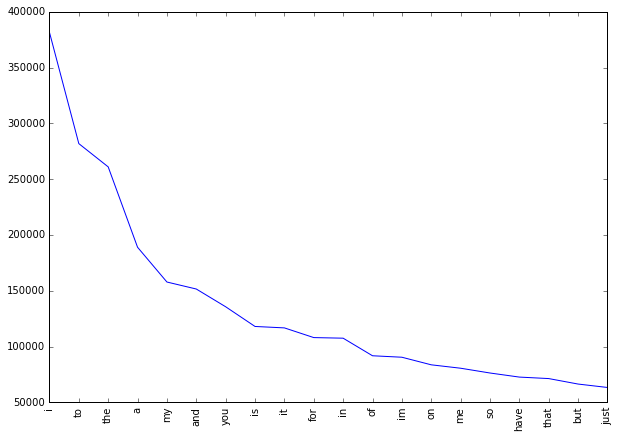

In [20]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in unigrams])
my_xticks = [i[0] for i in unigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [21]:
with open(BI_FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
bigrams = freq_dist.most_common(20)
bigrams

[(('in', 'the'), 22995),
 (('i', 'have'), 22519),
 (('going', 'to'), 21648),
 (('i', 'am'), 17651),
 (('for', 'the'), 17526),
 (('i', 'dont'), 16213),
 (('on', 'the'), 15744),
 (('to', 'be'), 15166),
 (('to', 'go'), 15030),
 (('to', 'the'), 14961),
 (('i', 'love'), 14608),
 (('have', 'to'), 14441),
 (('i', 'was'), 14342),
 (('have', 'a'), 14341),
 (('i', 'cant'), 14093),
 (('and', 'i'), 14081),
 (('but', 'i'), 13984),
 (('of', 'the'), 12563),
 (('i', 'think'), 12337),
 (('to', 'get'), 11317)]

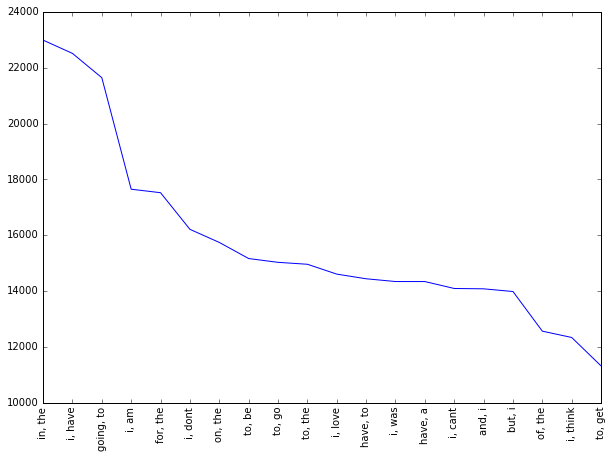

In [22]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in bigrams])
my_xticks = [', '.join(i[0]) for i in bigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [30]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(100)
log_ranks = np.log(range(1, 101))
log_freqs = np.log([i[1] for i in unigrams])
z = np.polyfit(log_ranks, log_freqs, 1)
p = np.poly1d(z)
p

poly1d([ -0.78168997,  13.31234705])

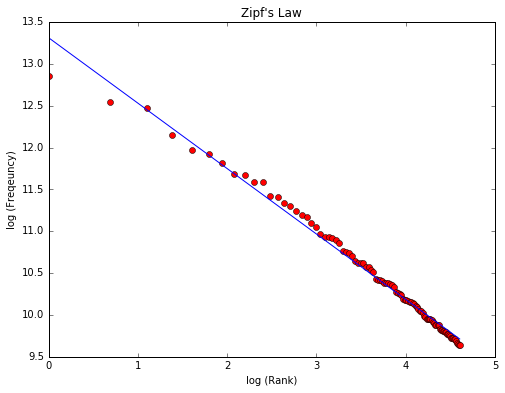

In [32]:
plt.figure(3, [8,6])
plt.plot(log_ranks, log_freqs, 'ro')
plt.plot(log_ranks,p(log_ranks),'b-')
plt.xlabel('log (Rank)')
plt.ylabel('log (Freqeuncy)')
plt.title('Zipf\'s Law')
plt.show()

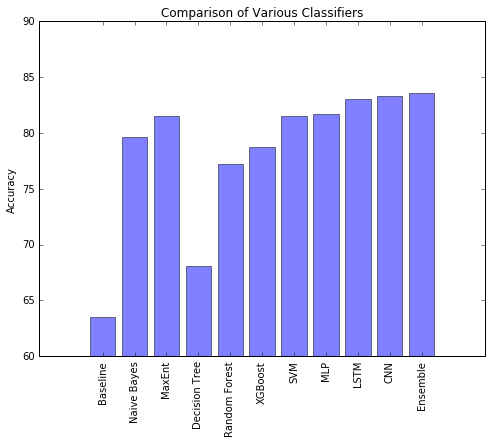

In [8]:
classifiers = ['Baseline', 'Naive Bayes', 'MaxEnt', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'MLP', 'LSTM', 'CNN', 'Ensemble']
accuracies = [63.48, 79.68, 81.52, 68.1, 77.21, 78.72, 81.55, 81.7, 83.00, 83.34, 83.58]
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align='center', alpha=0.5)
plt.xticks(range(len(classifiers)), classifiers, rotation=90)
plt.ylabel('Accuracy')
plt.title('Comparison of Various Classifiers')
plt.ylim([60, 90])
plt.show()